#### Etapa 01: Carregar Dados de Treino

In [1]:
# Importar bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns

# Ler e carregar a base de dados
dados_treino = 'titanic_train.csv'
treino_df = pd.read_csv(dados_treino)

# Examinar a base de dados
linhas, colunas = treino_df.shape # Extrair tamanho da base de dados
print('A base de dados de treino possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário

treino_df.head(10) # Visualizar as 10 primeiras linhas da base de dados

A base de dados de treino possui 891 linhas e 12 colunas.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Etapa 02: Carregar Dados de Teste

In [2]:
# Ler e carregar a base de dados
dados_teste = 'titanic_test.csv'
teste_df = pd.read_csv(dados_teste)

# Examinar a base de dados
linhas, colunas = teste_df.shape # Extrair tamanho da base de dados
print('A base de dados de teste possui {} linhas e {} colunas.'.format(linhas, colunas)) # Apresentar informação ao usuário

teste_df.head(10) # Visualizar as 10 primeiras linhas da base de dados

A base de dados de teste possui 418 linhas e 11 colunas.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


#### Etapa 03: Verificar a Influência do Gênero da Pessoa na sua Chance de Sobrevivênvia ao Naufrágio

In [38]:
women = treino_df.loc[treino_df.Sex == 'female']['Survived'] # Selecionar as linhas onde os passageiros são do sexo feminino
men = treino_df.loc[treino_df.Sex == 'male']['Survived'] # Selecionar as linhas onde os passageiros são do sexo masculino
rate_women = sum(women)/len(women) # Taxa de sobrevivência entre as mulheres
rate_men = sum(men)/len(men) # Taxa de sobrevivência entre os homens

# Apresenta ao usuário
print('O percentual de mulheres que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_women))
print('O percentual de homens que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_men))

O percentual de mulheres que sobreviveram ao naufrágio é de 74.20%.
O percentual de homens que sobreviveram ao naufrágio é de 18.89%.


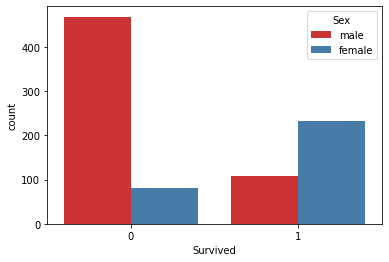

In [3]:
sns.countplot(x = 'Survived', data = treino_df, hue = 'Sex', palette = 'Set1');

#### Etapa 04: Verificar a Influência da Classe de Viagem da Pessoa na sua Chance de Sobrevivênvia ao Naufrágio

In [39]:
first_class = treino_df.loc[treino_df.Pclass == 1]['Survived'] # Selecionar as linhas onde os passageiros são 1ª classe
second_class = treino_df.loc[treino_df.Pclass == 2]['Survived'] # Selecionar as linhas onde os passageiros são 2ª classe
third_class = treino_df.loc[treino_df.Pclass == 3]['Survived'] # Selecionar as linhas onde os passageiros são 3ª classe
rate_1class = sum(first_class)/len(first_class) # Taxa de sobrevivência da 1ª classe
rate_2class = sum(second_class)/len(second_class) # Taxa de sobrevivência da 2ª classe
rate_3class = sum(third_class)/len(third_class) # Taxa de sobrevivência da 3ª classe

# Apresenta ao usuário
print('O percentual de passageiros da 1ª classe que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_1class))
print('O percentual de passageiros da 2ª classe que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_2class))
print('O percentual de passageiros da 3ª classe que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_3class))

O percentual de passageiros da 1ª classe que sobreviveram ao naufrágio é de 62.96%.
O percentual de passageiros da 2ª classe que sobreviveram ao naufrágio é de 47.28%.
O percentual de passageiros da 3ª classe que sobreviveram ao naufrágio é de 24.24%.


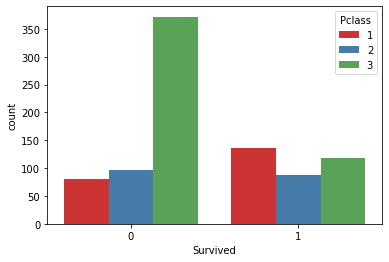

In [4]:
sns.countplot(x = 'Survived', data = treino_df, hue = 'Pclass', palette = 'Set1');

#### Etapa 05: Verificar a Influência do Local de Embarque da Pessoa na sua Chance de Sobrevivênvia ao Naufrágio

In [40]:
queenstown = treino_df.loc[treino_df.Embarked == 'Q']['Survived'] # Selecionar as linhas onde os passageiros são de Queenstown
cherbourg = treino_df.loc[treino_df.Embarked == 'C']['Survived'] # Selecionar as linhas onde os passageiros são de Cherbourg
southampton = treino_df.loc[treino_df.Embarked == 'S']['Survived'] # Selecionar as linhas onde os passageiros são de Southampton
rate_Q = sum(queenstown)/len(queenstown) # Taxa de sobrevivência dos embarcados em Queenstown
rate_C = sum(cherbourg)/len(cherbourg) # Taxa de sobrevivência dos embarcados em Cherbourg
rate_S = sum(southampton)/len(southampton) # Taxa de sobrevivência dos embarcados em Southampton

# Apresenta ao usuário
print('O percentual de passageiros embarcados em Queenstown que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_Q))
print('O percentual de passageiros embarcados em Cherbourg que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_C))
print('O percentual de passageiros embarcados em Southampton que sobreviveram ao naufrágio é de {:.2%}.'.format(rate_S))

O percentual de passageiros embarcados em Queenstown que sobreviveram ao naufrágio é de 38.96%.
O percentual de passageiros embarcados em Cherbourg que sobreviveram ao naufrágio é de 55.36%.
O percentual de passageiros embarcados em Southampton que sobreviveram ao naufrágio é de 33.70%.


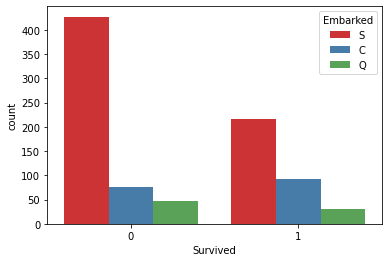

In [5]:
sns.countplot(x = 'Survived', data = treino_df, hue = 'Embarked', palette = 'Set1');

#### Etapa 06: Diferentes Topologias de Machine Learning para Classificador Random Forest

#### Introdução

As árvores de decisão (**decision trees**) deixam você com uma decisão difícil. Uma árvore profunda com muitas folhas se ajustará demais porque cada previsão vem de dados históricos de apenas alguns passageiros em sua folha. Mas uma árvore rasa com poucas folhas terá um desempenho ruim porque não consegue capturar tantas distinções nos dados brutos.

Mesmo as técnicas de modelagem mais sofisticadas de hoje enfrentam essa tensão entre underfitting e overfitting. Porém, muitos modelos têm ideias inteligentes que podem levar a um melhor desempenho. Veremos a floresta aleatória (**random forest**) como exemplo.

A floresta aleatória (**random forest**) usa muitas árvores e faz uma previsão calculando a média das previsões de cada árvore componente. Geralmente, tem uma precisão preditiva muito melhor do que uma única árvore de decisão (**decision tree**) e funciona bem com os parâmetros padrão. Se você continuar modelando, poderá aprender mais modelos com desempenho ainda melhor, mas muitos deles são sensíveis à obtenção dos parâmetros corretos.

In [4]:
# Importar bibliotecas necessárias
from sklearn.ensemble import RandomForestClassifier

# Definir dados de entrada e saída do modelo a ser treinado
y = treino_df['Survived'] # Saída do modelo
features = ['Pclass', 'Sex', 'SibSp', 'Parch'] # Características usadas como entrada do modelo
X_treino = pd.get_dummies(treino_df[features]) # Dados de treino
X_teste = pd.get_dummies(teste_df[features]) # Dados de teste

# Definir estrutura e parâmetros de um classificador Random Forest
model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1) # Modelo definido
model.fit(X_treino, y) # Treinar modelo com os dados de treino
predictions = model.predict(X_teste) # Predições do modelo já treinado para os dados de teste

# Exportar as predições do modelo na forma de um Dataframe
output = pd.DataFrame({'PassengerId': teste_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index = False) # Salvar arquivo CSV no computador
print("Sua submissão foi salva com sucesso!")
print('Esse modelo alcançou uma pontuação pública na plataforma Kaggle igual a 0.77511 em uma escala de 0 (zero) a 1 (um).')

Sua submissão foi salva com sucesso!
Esse modelo alcançou uma pontuação pública na plataforma Kaggle igual a 0.77511 em uma escala de 0 (zero) a 1 (um).


In [13]:
# Definir dados de entrada e saída do modelo a ser treinado
y = treino_df['Survived'] # Saída do modelo
features = ['Pclass', 'Sex', 'SibSp', 'Parch'] # Características usadas como entrada do modelo
X_treino = pd.get_dummies(treino_df[features]) # Dados de treino
X_teste = pd.get_dummies(teste_df[features]) # Dados de teste

# Definir estrutura e parâmetros de um classificador Random Forest
model = RandomForestClassifier(n_estimators = 50, max_depth = 5, random_state = 1) # Modelo definido
model.fit(X_treino, y) # Treinar modelo com os dados de treino
predictions = model.predict(X_teste) # Predições do modelo já treinado para os dados de teste

# Exportar as predições do modelo na forma de um Dataframe
output = pd.DataFrame({'PassengerId': teste_df.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index = False) # Salvar arquivo CSV no computador
print("Sua submissão foi salva com sucesso!")
print('Esse modelo alcançou uma pontuação pública na plataforma Kaggle igual a 0.77751 em uma escala de 0 (zero) a 1 (um).')

Sua submissão foi salva com sucesso!
Esse modelo alcançou uma pontuação pública na plataforma Kaggle igual a 0.77751 em uma escala de 0 (zero) a 1 (um).
